# Diwali_Sales_Analysis 


## Data and Setup

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
df = pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')
# to avoid encoding error , here i use 'unicode_escape'
df.shape 
# ---> gives the total no. of rows & coloumns

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning and Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# dropping unrated & blank column
df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [10]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
type(df['Amount'].iloc[0])

numpy.float64

In [13]:
# change data type of amount col. from float to int
df['Amount'] = df['Amount'].astype('int')

In [14]:
type(df['Amount'].iloc[0])

numpy.int32

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe().round()

,User_ID,Age,Marital_Status,Orders,Amount
count,11239.0,11239.0,11239.0,11239.0,11239.0
mean,1003004.0,35.0,0.0,2.0,9454.0
std,1716.0,13.0,0.0,1.0,5222.0
min,1000001.0,12.0,0.0,1.0,188.0
25%,1001492.0,27.0,0.0,2.0,5443.0
50%,1003064.0,33.0,0.0,2.0,8109.0
75%,1004426.0,43.0,1.0,3.0,12675.0
max,1006040.0,92.0,1.0,4.0,23952.0


In [17]:
df[['Age', 'Orders', 'Amount']].describe().round()

,Age,Orders,Amount
count,11239.0,11239.0,11239.0
mean,35.0,2.0,9454.0
std,13.0,1.0,5222.0
min,12.0,1.0,188.0
25%,27.0,2.0,5443.0
50%,33.0,2.0,8109.0
75%,43.0,3.0,12675.0
max,92.0,4.0,23952.0


# Exploratory Data Analysis

### Gender

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

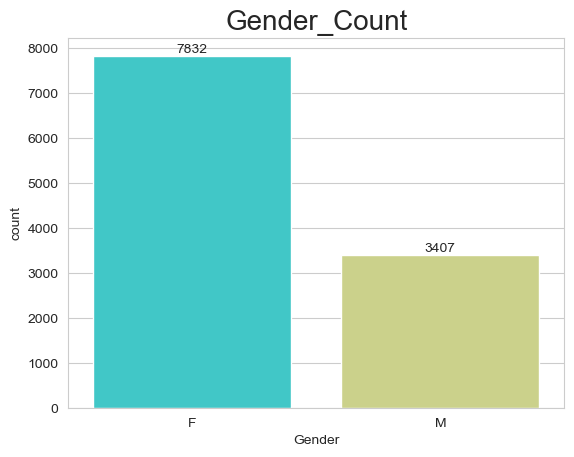

In [35]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df,palette='rainbow')
ax.set_title('Gender_Count',size= 20)
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Gender vs Total amount they spending')

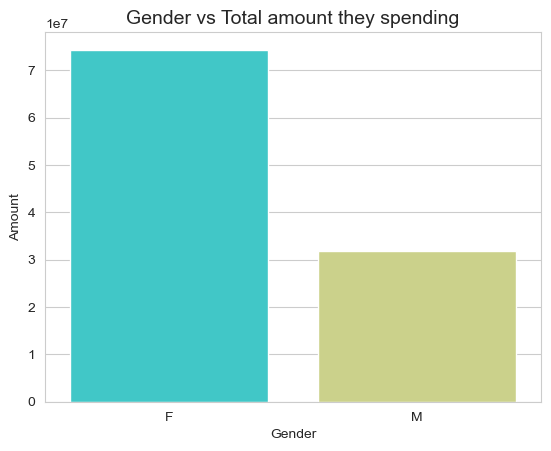

In [36]:
# plotting a bar chart for gender vs total amount they spending

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette='rainbow')
ax.set_title('Gender vs Total amount they spending',size= 14)

*From the above graphs, it is clear that the majority of buyers are **female** and that their purchasing power is higher than that of males.*

### For Age

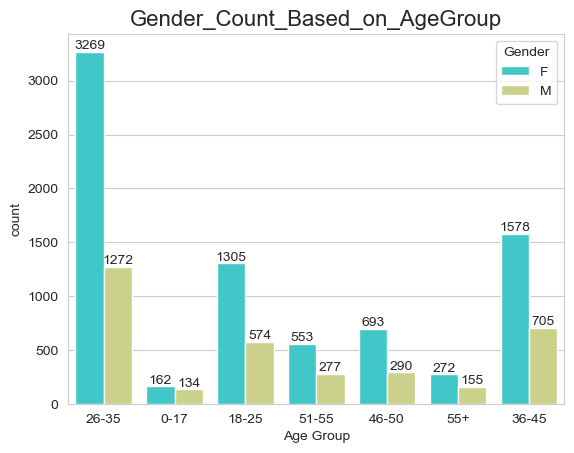

In [37]:
# plotting a Countplot for Gender_Count_Based_on_AgeGroup

ax = sns.countplot(x='Age Group',data=df,hue='Gender',palette='rainbow')
ax.set_title('Gender_Count_Based_on_AgeGroup',size = 16)

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Total Amount Spend vs Age Group')

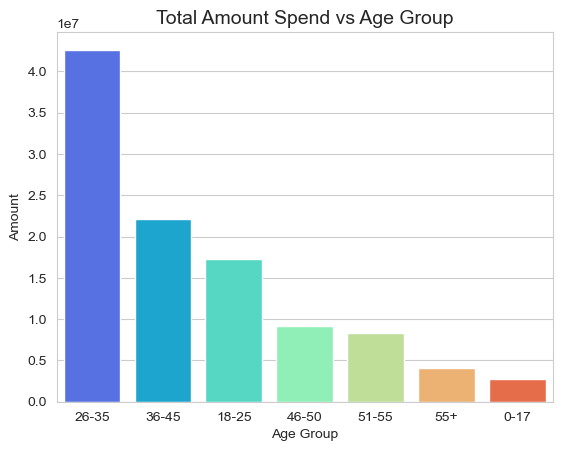

In [38]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette='rainbow')
ax.set_title('Total Amount Spend vs Age Group',size= 14)

*From above graphs we concluded that most of the buyers are of age group between **26-35 yrs** female*

### State

Text(0.5, 1.0, 'Top 10 states with highest order')

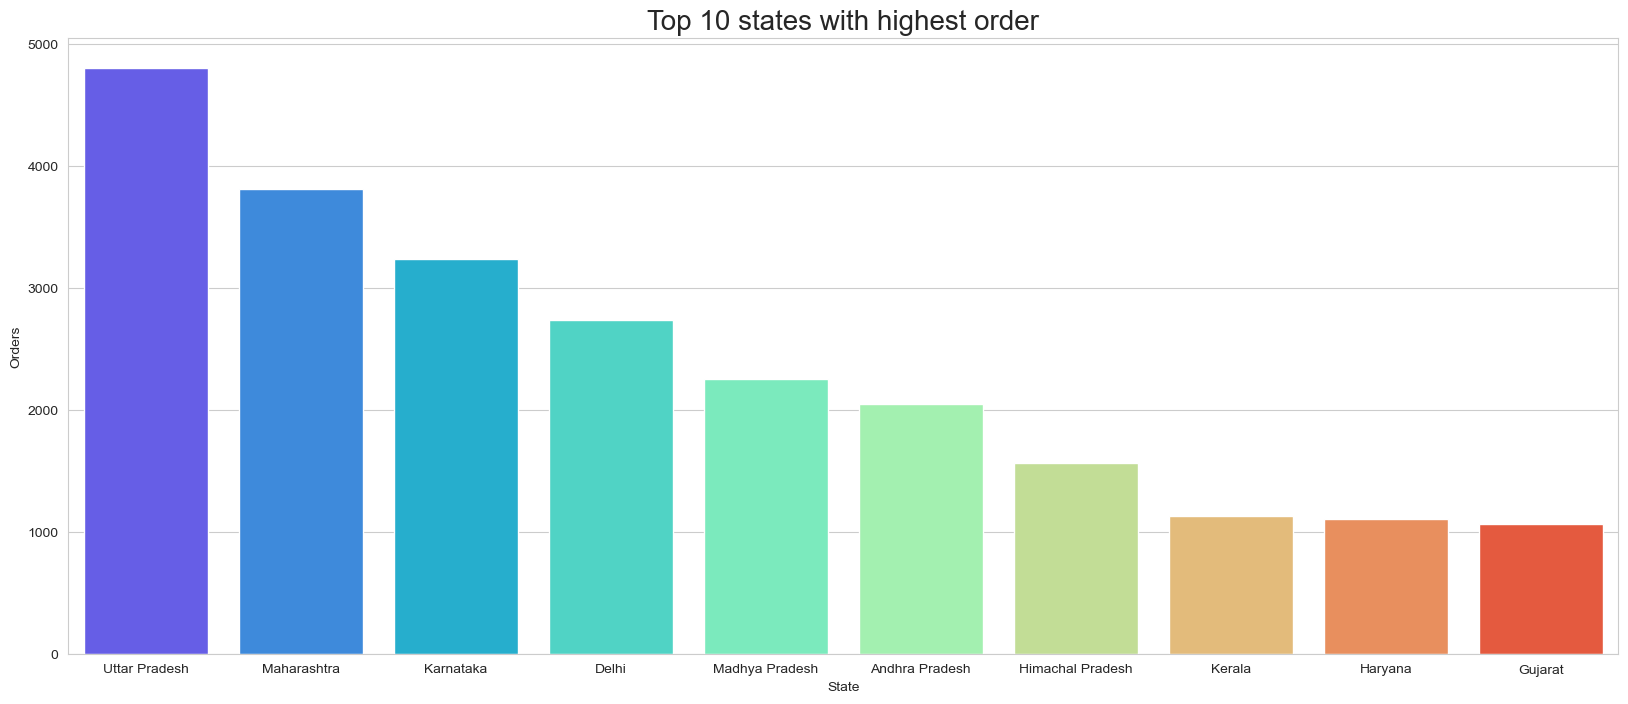

In [42]:
# total number of orders from top 10 states
plt.figure(figsize = (20,8))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

ax= sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette='rainbow')

ax.set_title('Top 10 states with highest order',size= 20)

Text(0.5, 1.0, 'Top 10 states wrt Amount_spent')

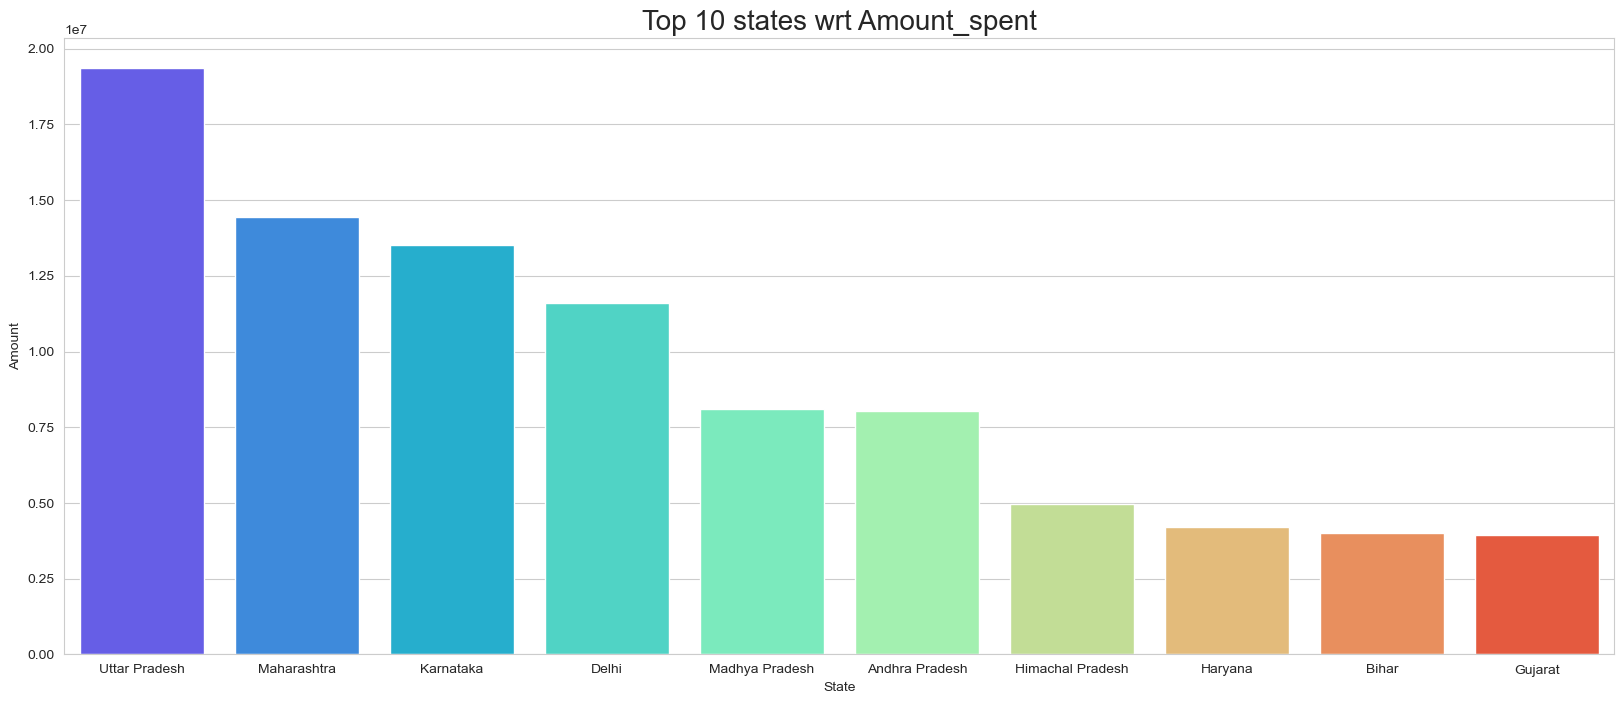

In [44]:
# total amount/sales from top 10 states
plt.figure(figsize = (20,8))
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette='rainbow')
ax.set_title('Top 10 states wrt Amount_spent',size= 20)

*From above graphs we can see that most of the orders & total sales/amount are from **Uttar Pradesh, Maharashtra and Karnataka** respectively*

### Marital_Status

In [55]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


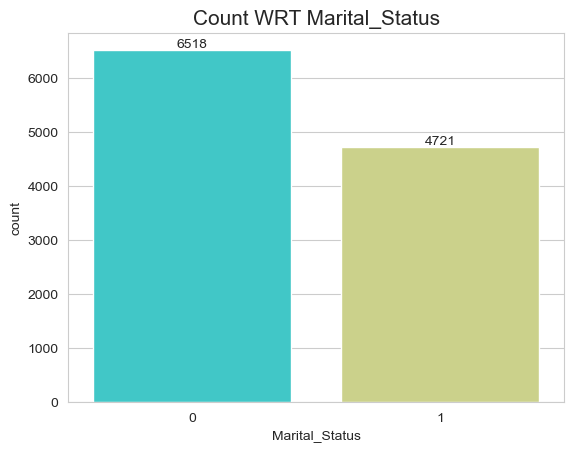

In [46]:
ax = sns.countplot(data = df, x = 'Marital_Status',palette='rainbow')
ax.set_title('Count WRT Marital_Status',size= 15)

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Amount_Count WRT Males & Females')

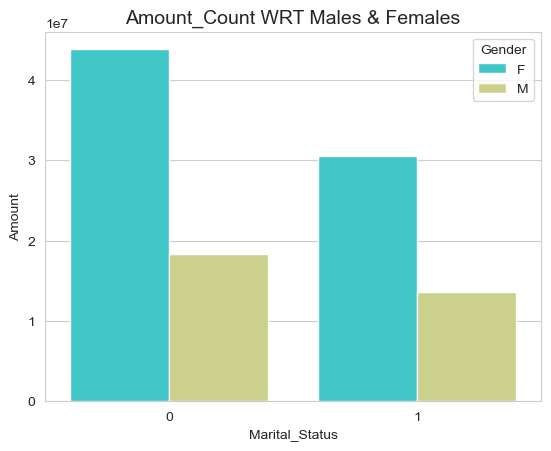

In [50]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


ax= sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette='rainbow')
ax.set_title('Amount_Count WRT Males & Females',size= 14)


*From above graphs we can conclude that most of the buyers are **married (women)** and they have high purchasing power*

### Occupation

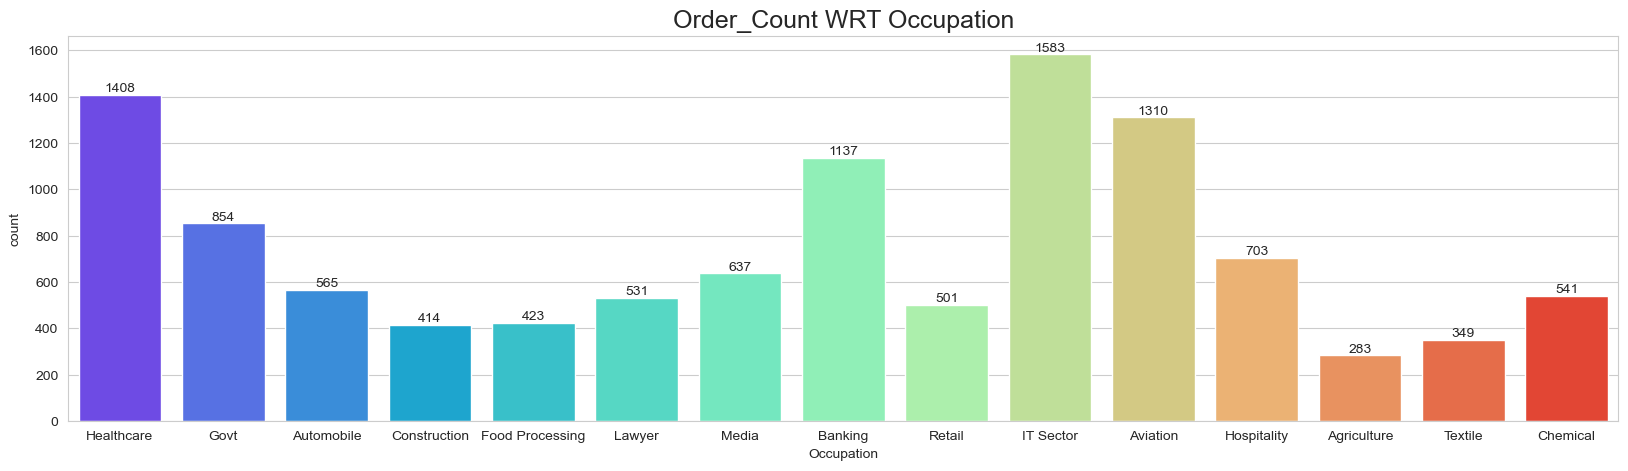

In [52]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Occupation',palette='rainbow')
ax.set_title('Order_Count WRT Occupation',size= 18)


for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Amount_Spend WRT Occupation')

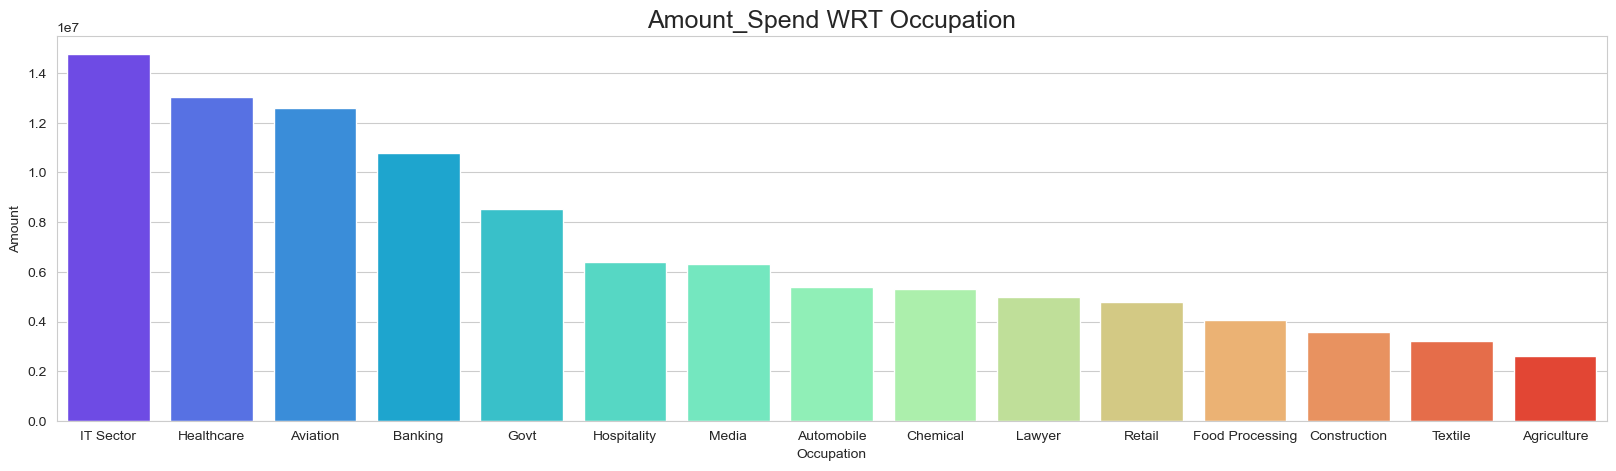

In [53]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(20,5))

ax= sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='rainbow')
ax.set_title('Amount_Spend WRT Occupation',size= 18)

*From above graphs we can see that most of the buyers are working in **IT, Healthcare and Aviation sector.***

### Product Category

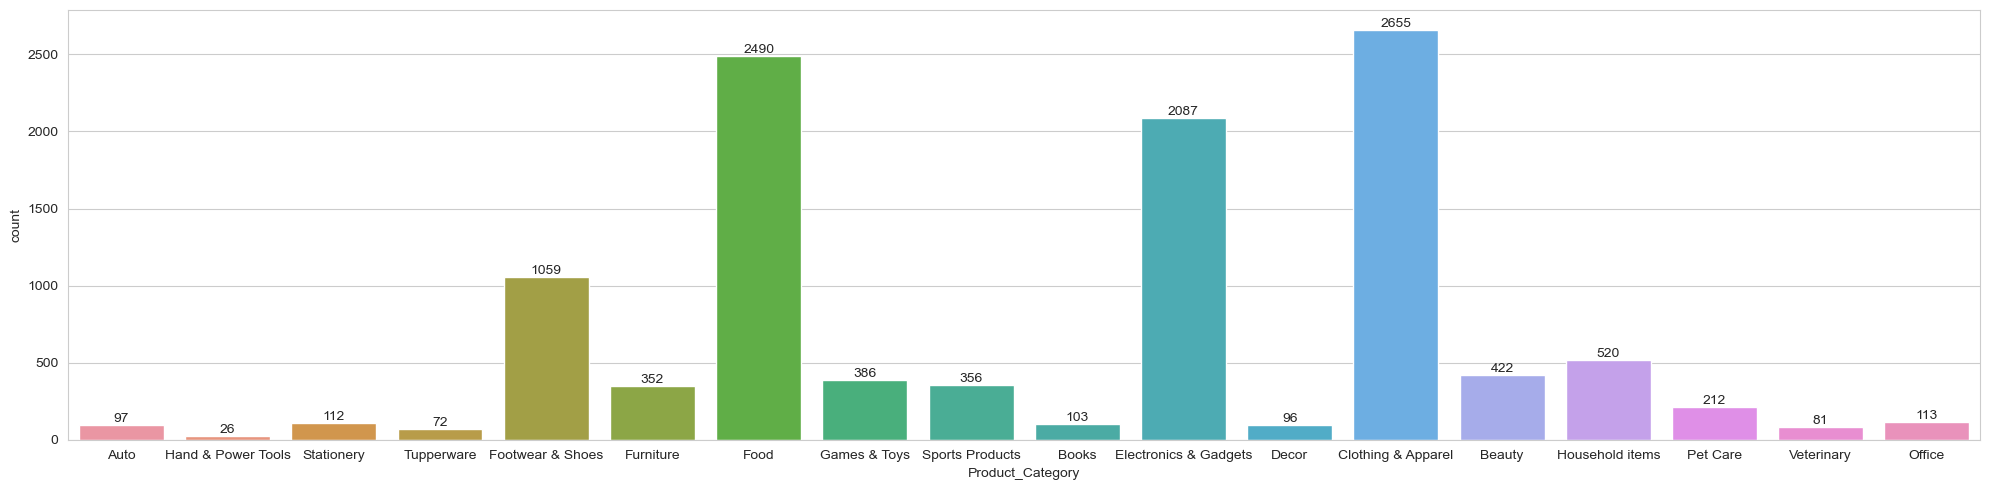

In [60]:
# Total_Count Vs Product Category

plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()   

<Axes: xlabel='Product_Category', ylabel='Amount'>

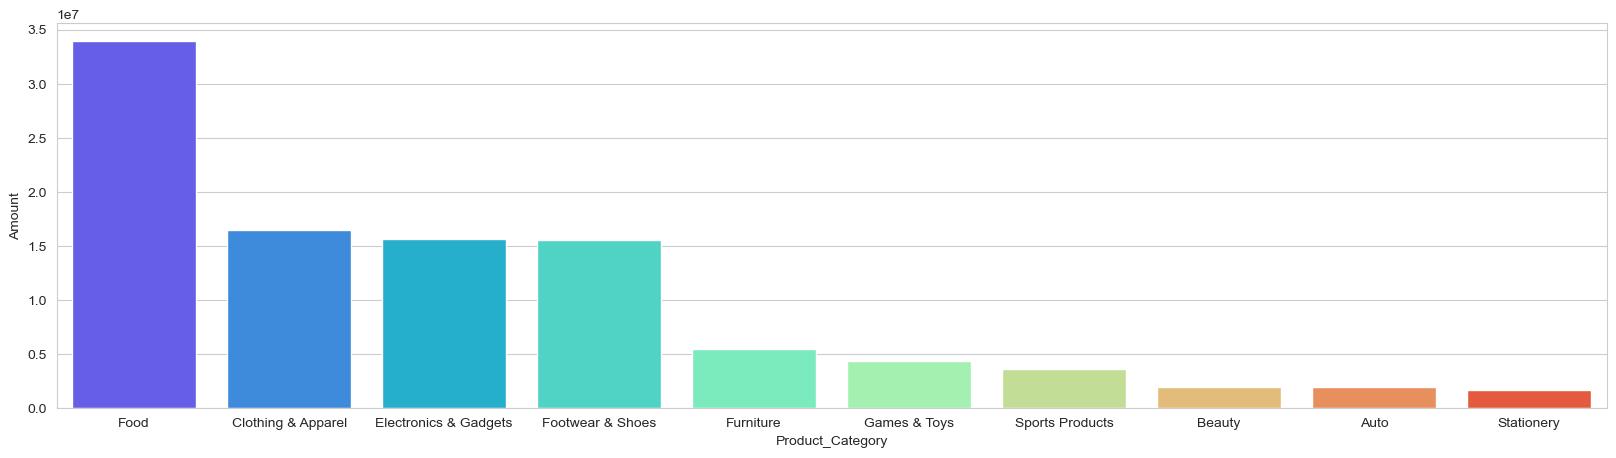

In [61]:
# Total_Amount_Count Vs Product Category

plt.figure(figsize=(20,5))
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='rainbow')


*From above graphs we can see that most of the sold products are from **Food, Clothing and Electronics category**.*

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#  Best Orders according to  Product_Id

<Axes: xlabel='Product_ID', ylabel='Orders'>

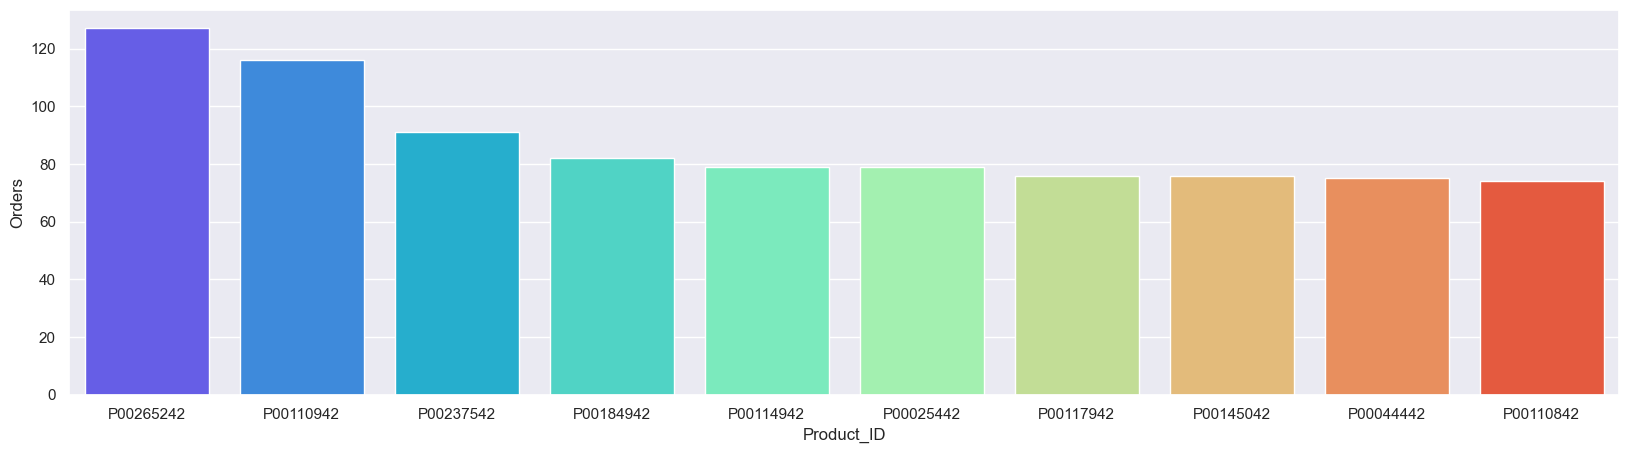

In [87]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='rainbow')

<Axes: xlabel='Product_ID'>

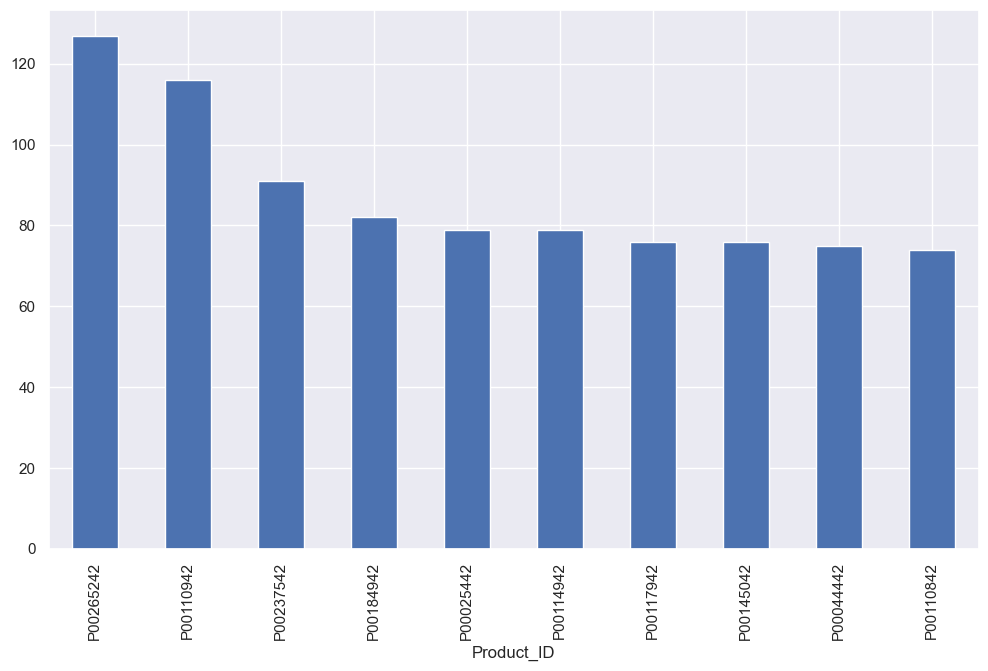

In [86]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:


*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*